K-NN not selected because of it uses he non -parametric method this method is used for unknown distribution and small dataset

Decision tree has low bias high variance we use random forest has low variance

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

In [3]:
dataset=pd.read_csv("C:/Users/WELCOME/Desktop/Mini Project/heart_failure_clinical_records_dataset.csv")

In [4]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
dataset.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
dataset['age']=dataset['age'].astype(int)

In [9]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


C:\Users\WELCOME\anaconda3\envs\HeartDisease\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Is linear or not check'}, ylabel='platelets'>

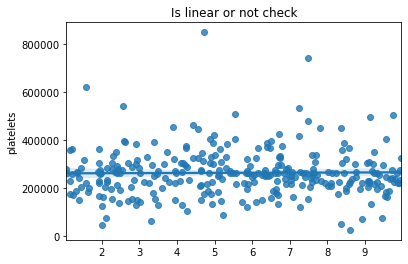

In [10]:
plt.title('Is linear or not check')
x= np.random.uniform(1,10,299)
plt.ylabel('platelets')
y=dataset['platelets']
sns.regplot(x, y)


In [11]:
from sklearn.metrics import r2_score
x= dataset['ejection_fraction']
x1=[1,2,3,4]
y1=[1,2,3,4]
# For dataset1 check r2_score
y=dataset['platelets']
print('R2 Score is: ', r2_score(x1, y1))


R2 Score is:  1.0


In [12]:
features_columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 
                  'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 
                  'sex', 'smoking', 'time']
predicted_class=['DEATH_EVENT']
x=dataset[features_columns].values
y=dataset[predicted_class].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)


In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [14]:
from sklearn.metrics import r2_score
print(r2_score(regressor.predict(x), y))

-0.49411691049673423


I check data is linear or not.
It is non_linear

In [15]:
Died=len(dataset[dataset['DEATH_EVENT']==1])
Survived=len(dataset[dataset['DEATH_EVENT']==0])
print(("Died Percentage:{0}".format(int((Died/dataset['DEATH_EVENT'].count())*100))))
print(("Survived Percentage:{0}".format(int((Survived/dataset['DEATH_EVENT'].count())*100))))


Died Percentage:32
Survived Percentage:67


<AxesSubplot:>

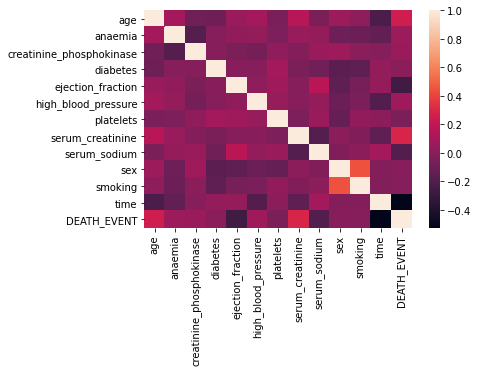

In [16]:
corr = dataset.corr()

sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)


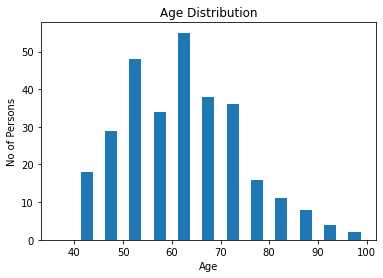

In [17]:
bins = [35,40,45,50,55,60,65,70,75,80,85,90,95,100]
plt.hist(dataset['age'], bins, histtype='bar', rwidth=0.5)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('No of Persons')
plt.show()


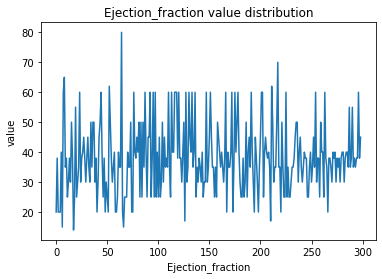

In [18]:
plt.plot(dataset['ejection_fraction'])
plt.title('Ejection_fraction value distribution')
plt.xlabel('Ejection_fraction')
plt.ylabel('value')
plt.show()

In [19]:
.qqplot(dataset['ejection_fraction'])
plt.show()

SyntaxError: invalid syntax (<ipython-input-19-b1a117223587>, line 1)

In [20]:
features_columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 
                  'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 
                  'sex', 'smoking', 'time']
predicted_class=['DEATH_EVENT']
x=dataset[features_columns].values
y=dataset[predicted_class].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [21]:
model=LogisticRegression(max_iter=300)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\Users\WELCOME\anaconda3\envs\HeartDisease\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [22]:
print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

0.7333333333333333
[[35  2]
 [14  9]]


The false positive rate  that a positive result will be given when the true value is negative.

The true positive rate (TPR, also called sensitivity) is calculated as TP/TP+FN. TPR is the probability that an actual positive will test positive.

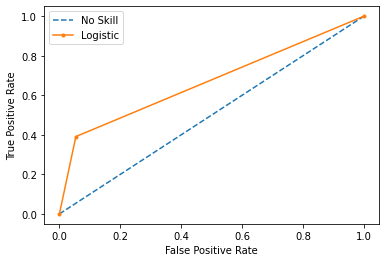

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
#pyplot.scatter(0.5,0.78, marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

A model that produces no false negatives has a recall of 1.0.


A model that produces no false positives has a precision of 1.0.

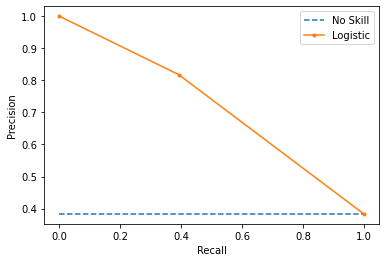

In [24]:
 "Calculating precision and recall(figure_5)"
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
decision_y_pred = classifier.predict(x_test)

In [26]:
print(accuracy_score(y_test,decision_y_pred))
cm = confusion_matrix(y_test, decision_y_pred)
print(cm)

0.85
[[34  3]
 [ 6 17]]


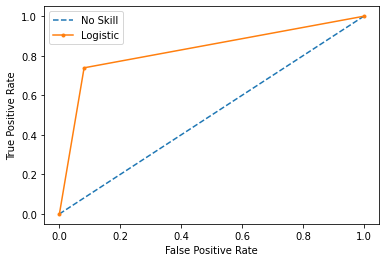

In [27]:
fpr, tpr, thresholds = roc_curve(y_test,decision_y_pred)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
#pyplot.scatter(0.5,0.78, marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

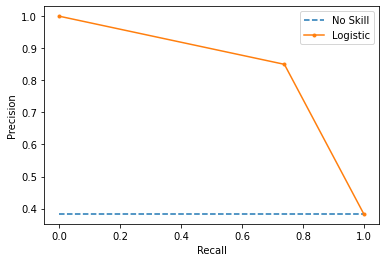

In [28]:
 "Calculating precision and recall(figure_5)"
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test,decision_y_pred)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [29]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)
svm_y_pred = classifier.predict(x_test)

C:\Users\WELCOME\anaconda3\envs\HeartDisease\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [30]:
print(accuracy_score(y_test,svm_y_pred))
cm = confusion_matrix(y_test,svm_y_pred)
print(cm)

0.7666666666666667
[[36  1]
 [13 10]]


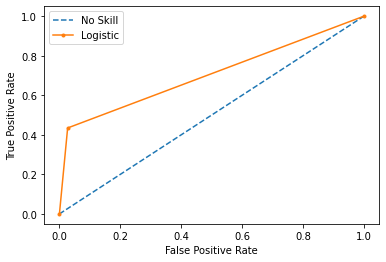

In [31]:
fpr, tpr, thresholds = roc_curve(y_test,svm_y_pred)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
#pyplot.scatter(0.5,0.78, marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 0)
classifier.fit(x_train, y_train)
rfc_y_pred = classifier.predict(x_test)


<ipython-input-32-7f4113bfbd89>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)


In [33]:
print(accuracy_score(y_test,rfc_y_pred))
cm = confusion_matrix(y_test,rfc_y_pred)
print(cm)

0.8333333333333334
[[36  1]
 [ 9 14]]


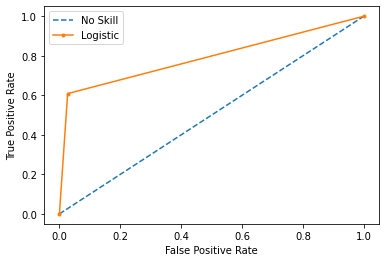

In [34]:
fpr, tpr, thresholds = roc_curve(y_test,rfc_y_pred)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
#pyplot.scatter(0.5,0.78, marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

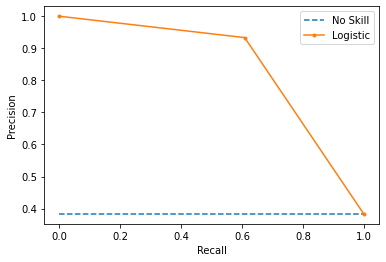

In [35]:
 "Calculating precision and recall(figure_5)"
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test,rfc_y_pred)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [102]:
random_forest = RandomForestClassifier(n_estimators=100,criterion='gini')
random_forest.fit(x_train, y_train)

threshold = 0.4
predicted = random_forest.predict_proba(x_test)
predicted_proba= (predicted [:,1] >= threshold).astype('int')
accuracy = accuracy_score(y_test, predicted_proba)
print(round(accuracy,4,)*100, "%")


86.67 %


<ipython-input-102-40ae2e0aafde>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train, y_train)


In [103]:
print(accuracy_score(y_test,predicted_proba))
cm = confusion_matrix(y_test,predicted_proba)
print(cm)

0.8666666666666667
[[32  5]
 [ 3 20]]
